# Exploring the Mental Well-being of Students

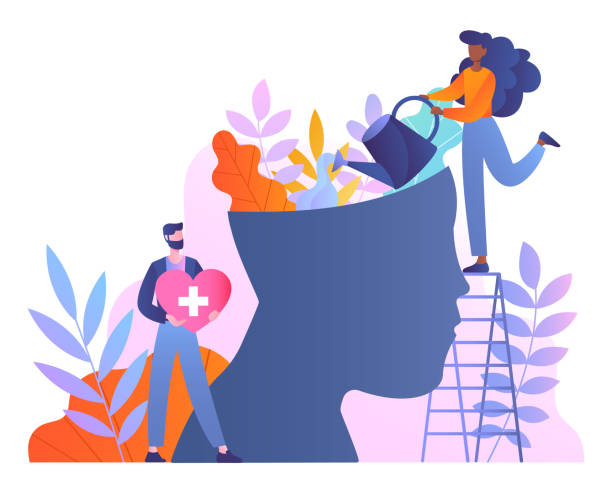

In [1]:
import pymysql
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
host = 'localhost'
user = 'root'
password = '***********'
database = 'portfolioproject'
conn = pymysql.connect(host=host, user=user, password=password, database=database)
cursor = conn.cursor()

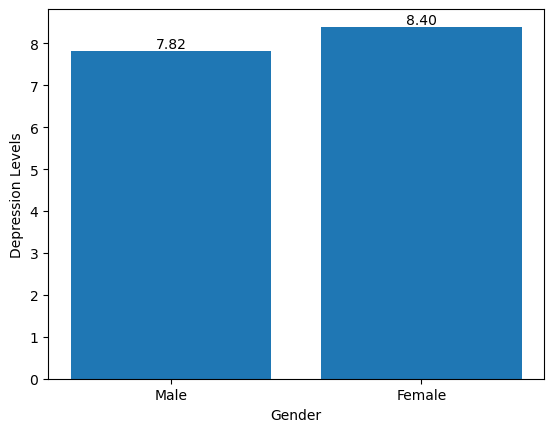

In [3]:
query = """
SELECT 
    AVG(todep) as avg_depression,
    gender
FROM 
    students
GROUP BY 
    gender;
"""

cursor.execute(query)

mental_health_data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(mental_health_data, columns=columns)

plt.bar(df['gender'], df['avg_depression'])
plt.xlabel('Gender')
plt.ylabel('Depression Levels')

for i, value in enumerate(df['avg_depression']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

In our analysis, male students exhibit an average depression levels of 7.82, while female students show a higher average of 8.40. This 7.41% difference suggests a potential gender-related variation in depression levels among the student population. 

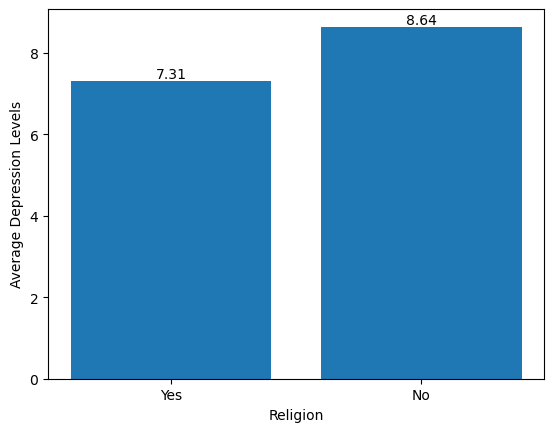

In [4]:
query = """
SELECT 
    AVG(todep) as avg_depression,
    religion
FROM 
    students
GROUP BY 
    religion;
"""
cursor.execute(query)

mental_health_data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(mental_health_data, columns=columns)

plt.bar(df['religion'], df['avg_depression'])
plt.xlabel('Religion')
plt.ylabel('Average Depression Levels')

for i, value in enumerate(df['avg_depression']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

Individuals who do not identify with any religious belief exhibit, on average, an 18% higher levels for depression. This observation underscores the potential influence of religious beliefs on mental well-being, suggesting a noteworthy association between non-religious affiliation and an increased likelihood of experiencing depression.

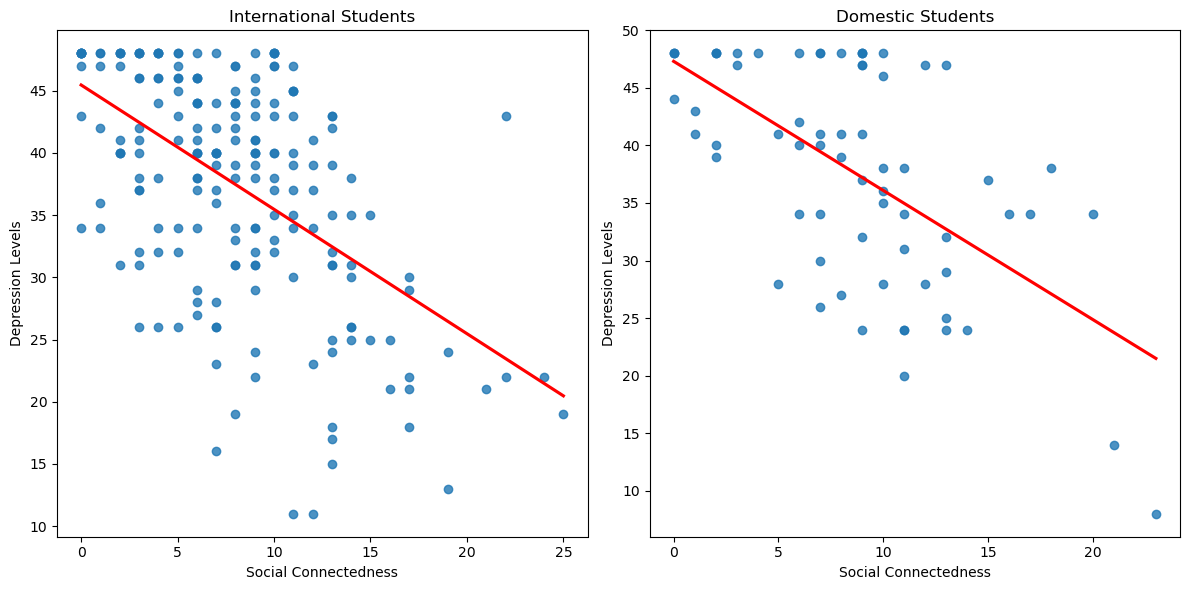

In [5]:
query = """
SELECT
  todep,tosc
FROM students
WHERE inter_dom='Inter';
"""
cursor.execute(query)

mental_health_data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df1 = pd.DataFrame(mental_health_data, columns=columns)

query = """
SELECT
  todep,tosc
FROM students
WHERE inter_dom='Dom';
"""
cursor.execute(query)

mental_health_data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df2 = pd.DataFrame(mental_health_data, columns=columns)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.regplot(x=df1['todep'], y=df1['tosc'], ci=None, line_kws={'color': 'red'})
plt.title('International Students')
plt.xlabel('Social Connectedness')
plt.ylabel('Depression Levels')


plt.subplot(1, 2, 2)
sns.regplot(x=df2['todep'], y=df2['tosc'], ci=None, line_kws={'color': 'red'})
plt.title('Domestic Students')
plt.xlabel('Social Connectedness')
plt.ylabel('Depression Levels')

plt.tight_layout()
plt.show()

The correlation between diminished depression levels and heightened social connectedness suggests that individuals with robust social bonds may experience a lower susceptibility to depression. This connection underscores the potential protective influence of strong interpersonal relationships on mental well-being.

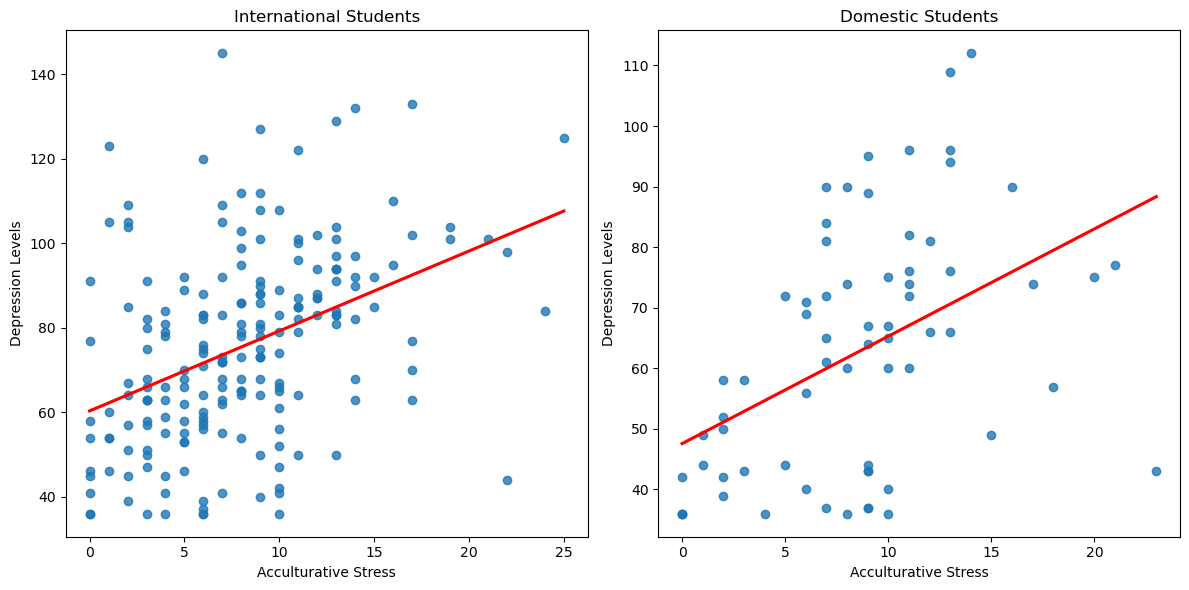

In [6]:
query = """
SELECT
  todep,toas
FROM students
WHERE inter_dom='Inter';
"""
cursor.execute(query)

mental_health_data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df1 = pd.DataFrame(mental_health_data, columns=columns)

query = """
SELECT
  todep,toas
FROM students
WHERE inter_dom='Dom';
"""
cursor.execute(query)

mental_health_data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df2 = pd.DataFrame(mental_health_data, columns=columns)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.regplot(x=df1['todep'], y=df1['toas'], ci=None, line_kws={'color': 'red'})
plt.title('International Students')
plt.xlabel('Acculturative Stress')
plt.ylabel('Depression Levels')


plt.subplot(1, 2, 2)
sns.regplot(x=df2['todep'], y=df2['toas'], ci=None, line_kws={'color': 'red'})
plt.title('Domestic Students')
plt.xlabel('Acculturative Stress')
plt.ylabel('Depression Levels')

plt.tight_layout()
plt.show()

As acculturative stress increases, there is a corresponding rise in depression levels. This positive correlation indicates that individuals experiencing higher levels of acculturative stress are more likely to exhibit elevated depression symptoms.

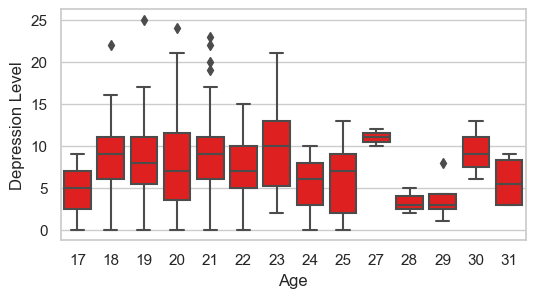

In [7]:
query = """
SELECT
  age,todep
FROM students;
"""
cursor.execute(query)
mental_health_data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
result_df = pd.DataFrame(mental_health_data, columns=columns)

plt.figure(figsize=(6, 3))
sns.set(style="whitegrid")

sns.boxplot(x='age', y='todep', data=result_df, color='red')

plt.xlabel('Age')
plt.ylabel('Depression Level')

plt.show()

Depression levels exhibit significant volatility between ages 17 and 25, stabilizing noticeably from 25 to 30, indicating a potential shift in emotional well-being during early adulthood.

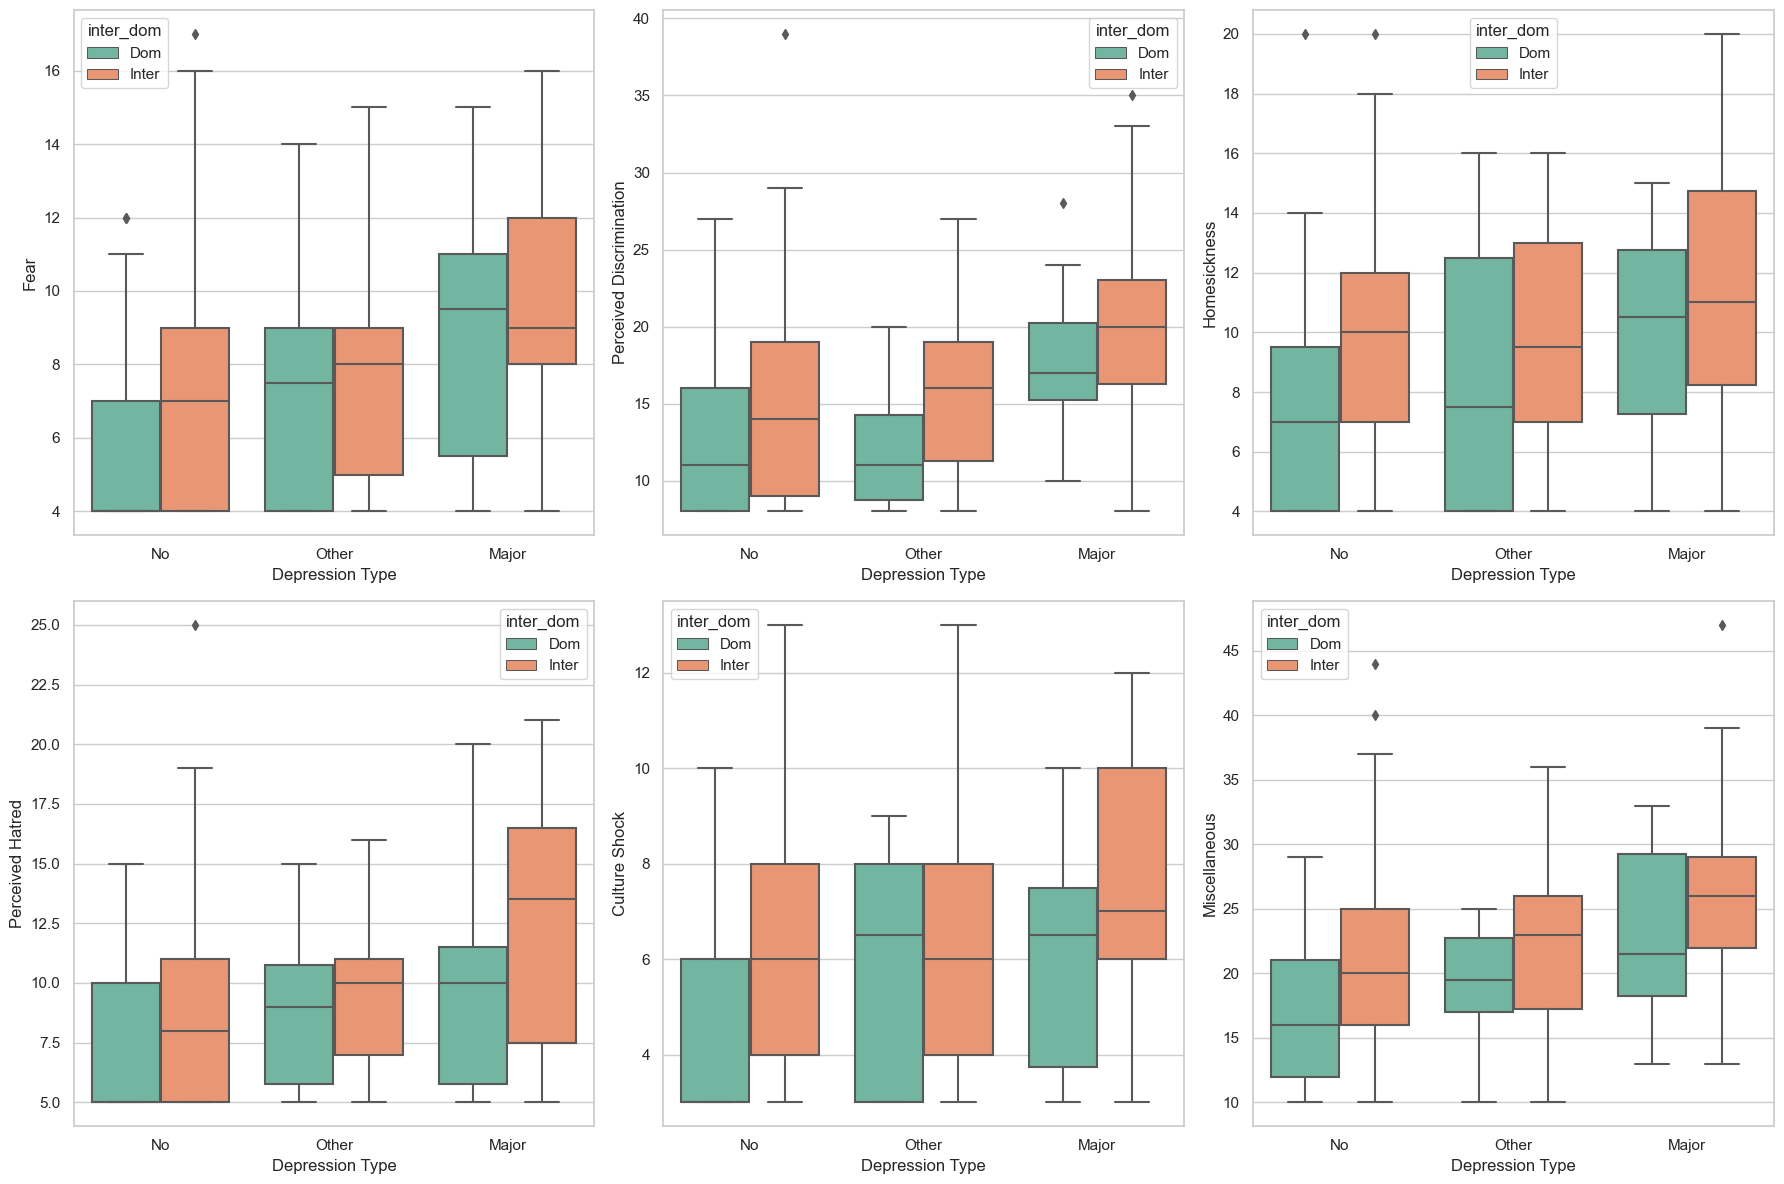

In [8]:
query1 = """
SELECT
  DepType, AFear, inter_dom
FROM students;
"""
cursor.execute(query1)
mental_health_data1 = cursor.fetchall()
columns1 = [desc[0] for desc in cursor.description]
result_df1 = pd.DataFrame(mental_health_data1, columns=columns1)


query2 = """
SELECT
  DepType, APD, inter_dom
FROM students;
"""
cursor.execute(query2)
mental_health_data2 = cursor.fetchall()
columns2 = [desc[0] for desc in cursor.description]
result_df2 = pd.DataFrame(mental_health_data2, columns=columns2)


query3 = """
SELECT
  DepType, AHome, inter_dom
FROM students;
"""
cursor.execute(query3)
mental_health_data3 = cursor.fetchall()
columns3 = [desc[0] for desc in cursor.description]
result_df3 = pd.DataFrame(mental_health_data3, columns=columns3)

query4 = """
SELECT
  DepType, APH, inter_dom
FROM students;
"""
cursor.execute(query4)
mental_health_data4 = cursor.fetchall()
columns4 = [desc[0] for desc in cursor.description]
result_df4 = pd.DataFrame(mental_health_data4, columns=columns4)

query5 = """
SELECT
  DepType, ACS, inter_dom
FROM students;
"""
cursor.execute(query5)
mental_health_data5 = cursor.fetchall()
columns5 = [desc[0] for desc in cursor.description]
result_df5 = pd.DataFrame(mental_health_data5, columns=columns5)

query6 = """
SELECT
  DepType, AMiscell, inter_dom
FROM students;
"""
cursor.execute(query6)
mental_health_data6 = cursor.fetchall()
columns6 = [desc[0] for desc in cursor.description]
result_df6 = pd.DataFrame(mental_health_data6, columns=columns6)


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))


sns.set(style="whitegrid")
sns.boxplot(x='DepType', y='AFear', hue='inter_dom', data=result_df1, palette='Set2', 
            hue_order=['Dom', 'Inter'], ax=axes[0,0])

axes[0,0].set_xlabel('Depression Type')
axes[0,0].set_ylabel('Fear')


sns.set(style="whitegrid")
sns.boxplot(x='DepType', y='APD', hue='inter_dom', data=result_df2, 
            palette='Set2', hue_order=['Dom', 'Inter'], ax=axes[0,1])

axes[0,1].set_xlabel('Depression Type')
axes[0,1].set_ylabel('Perceived Discrimination')


sns.set(style="whitegrid")
sns.boxplot(x='DepType', y='AHome', hue='inter_dom', data=result_df3, 
            palette='Set2', hue_order=['Dom', 'Inter'], ax=axes[0,2])

axes[0,2].set_xlabel('Depression Type')
axes[0,2].set_ylabel('Homesickness')


sns.set(style="whitegrid")
sns.boxplot(x='DepType', y='APH', hue='inter_dom', data=result_df4, palette='Set2', 
            hue_order=['Dom', 'Inter'], ax=axes[1,0])

axes[1,0].set_xlabel('Depression Type')
axes[1,0].set_ylabel('Perceived Hatred')


sns.set(style="whitegrid")
sns.boxplot(x='DepType', y='ACS', hue='inter_dom', data=result_df5, palette='Set2', 
            hue_order=['Dom', 'Inter'], ax=axes[1,1])

axes[1,1].set_xlabel('Depression Type')
axes[1,1].set_ylabel('Culture Shock')


sns.set(style="whitegrid")
sns.boxplot(x='DepType', y='AMiscell', hue='inter_dom', data=result_df6, palette='Set2', 
            hue_order=['Dom', 'Inter'], ax=axes[1,2])

axes[1,2].set_xlabel('Depression Type')
axes[1,2].set_ylabel('Miscellaneous')

plt.tight_layout()
plt.show()

 Students reporting suffering from major depressive
disorder seemed to receive higher scores in all kinds of acculturative stress than those who have no
or other depressive disorders. Notably, in all cases, the score of international students was relatively
more substantial than that of domestic students. Moreover, both international and domestic students
without depressive disorders might also be less likely to suffer from acculturative stress.


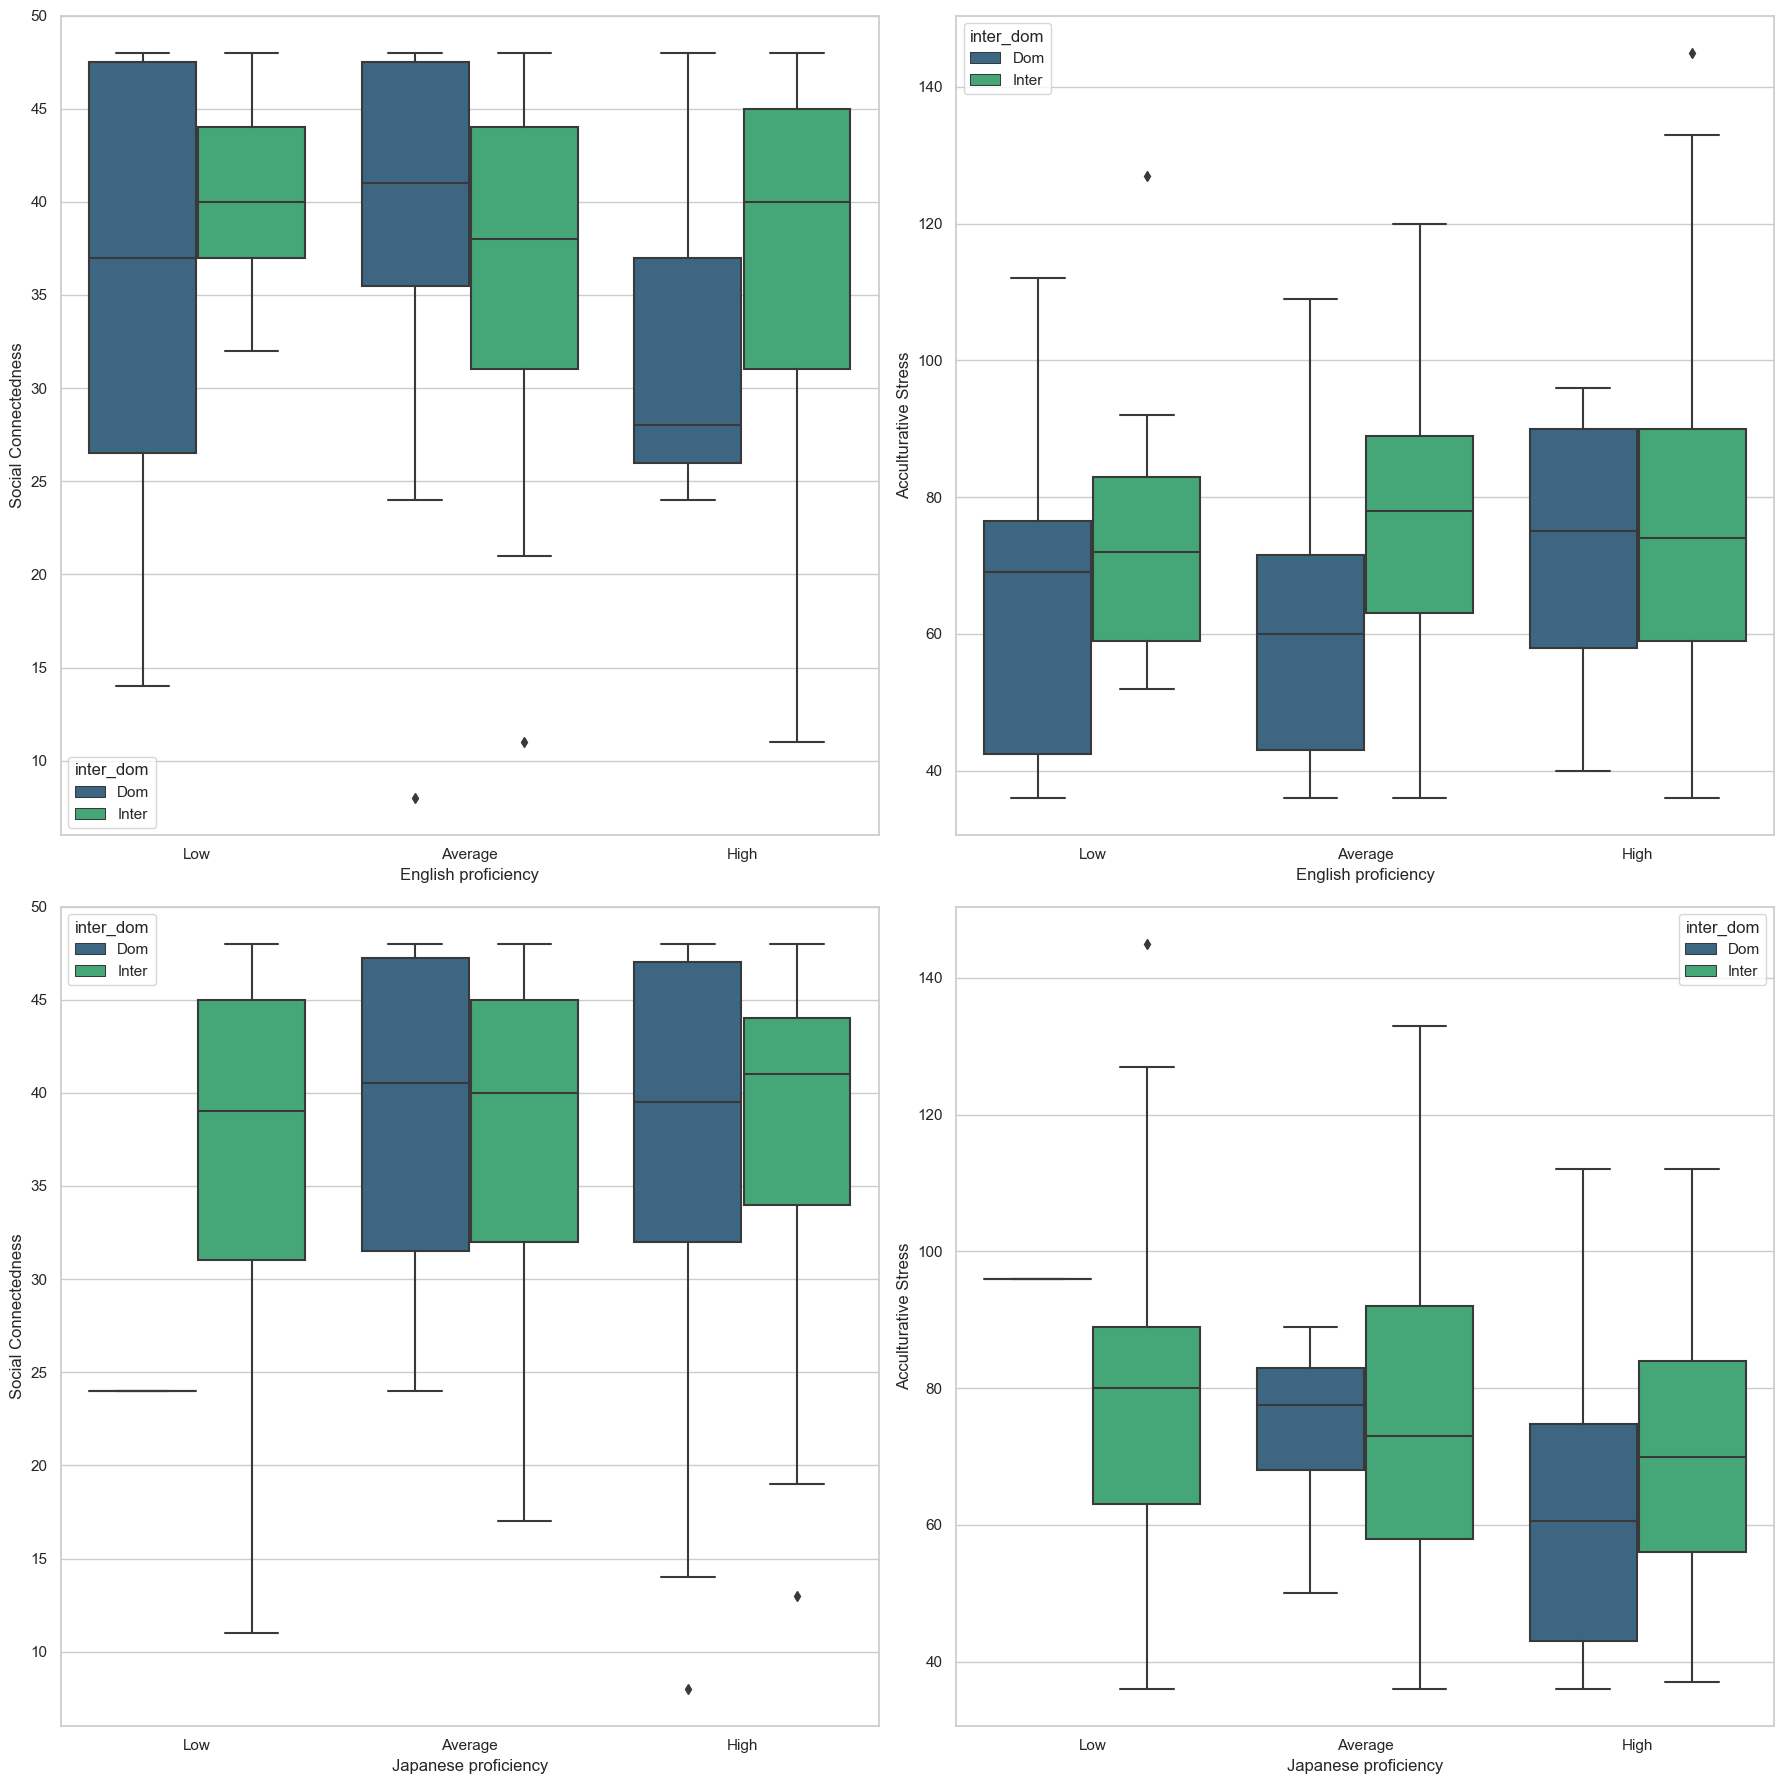

In [9]:
query_english = """
SELECT
  english_cate, ToSC, inter_dom
FROM students
ORDER BY
  CASE 
    WHEN english_cate = 'low' THEN 1
    WHEN english_cate = 'average' THEN 2
    WHEN english_cate = 'high' THEN 3
    ELSE 4 
  END;
"""
cursor.execute(query_english)
mental_health_data_english = cursor.fetchall()
columns_english = [desc[0] for desc in cursor.description]
result_df_english = pd.DataFrame(mental_health_data_english, columns=columns_english)


query_english = """
SELECT
  english_cate, ToAS, inter_dom
FROM students
ORDER BY
  CASE 
    WHEN english_cate = 'low' THEN 1
    WHEN english_cate = 'average' THEN 2
    WHEN english_cate = 'high' THEN 3
    ELSE 4 
  END;
"""
cursor.execute(query_english)
mental_health_data_english_second = cursor.fetchall()
columns_english = [desc[0] for desc in cursor.description]
result_df_english_second = pd.DataFrame(mental_health_data_english_second, columns=columns_english)


query_japanese = """
SELECT
  japanese_cate, ToSC, inter_dom
FROM students
ORDER BY
  CASE 
    WHEN japanese_cate = 'low' THEN 1
    WHEN japanese_cate = 'average' THEN 2
    WHEN japanese_cate = 'high' THEN 3
    ELSE 4 
  END;
"""
cursor.execute(query_japanese)
mental_health_data_japanese = cursor.fetchall()
columns_japanese = [desc[0] for desc in cursor.description]
result_df_japanese = pd.DataFrame(mental_health_data_japanese, columns=columns_japanese)


query_japanese = """
SELECT
  japanese_cate, ToAS, inter_dom
FROM students
ORDER BY
  CASE 
    WHEN japanese_cate = 'low' THEN 1
    WHEN japanese_cate = 'average' THEN 2
    WHEN japanese_cate = 'high' THEN 3
    ELSE 4 
  END;
"""
cursor.execute(query_japanese)
mental_health_data_japanese_second = cursor.fetchall()
columns_japanese = [desc[0] for desc in cursor.description]
result_df_japanese_second = pd.DataFrame(mental_health_data_japanese_second, columns=columns_japanese)


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 18))

sns.set(style="whitegrid")
sns.boxplot(x='japanese_cate', y='ToSC', hue='inter_dom', data=result_df_japanese, palette='viridis', 
            hue_order=['Dom', 'Inter'], ax=axes[1,0])

axes[1,0].set_xlabel('Japanese proficiency')
axes[1,0].set_ylabel('Social Connectedness')

sns.set(style="whitegrid")
sns.boxplot(x='japanese_cate', y='ToAS', hue='inter_dom', data=result_df_japanese_second, palette='viridis', 
            hue_order=['Dom', 'Inter'], ax=axes[1,1])

axes[1,1].set_xlabel('Japanese proficiency')
axes[1,1].set_ylabel('Acculturative Stress')

sns.set(style="whitegrid")
sns.boxplot(x='english_cate', y='ToSC', hue='inter_dom', data=result_df_english, palette='viridis', 
            hue_order=['Dom', 'Inter'], ax=axes[0,0])

axes[0,0].set_xlabel('English proficiency')
axes[0,0].set_ylabel('Social Connectedness')

sns.set(style="whitegrid")
sns.boxplot(x='english_cate', y='ToAS', hue='inter_dom', data=result_df_english_second, 
            palette='viridis', hue_order=['Dom', 'Inter'], ax=axes[0,1])

axes[0,1].set_xlabel('English proficiency')
axes[0,1].set_ylabel('Acculturative Stress')

plt.tight_layout()
plt.show()

Among international and domestic students, higher fluency in
Japanese might result in less acculturative stress, while the score of total connectedness remained almost
similar in all levels of Japanese proficiency. As for English proficiency, there were no clear correlational
tendencies between language proficiency and acculturative stress as well as social connectedness

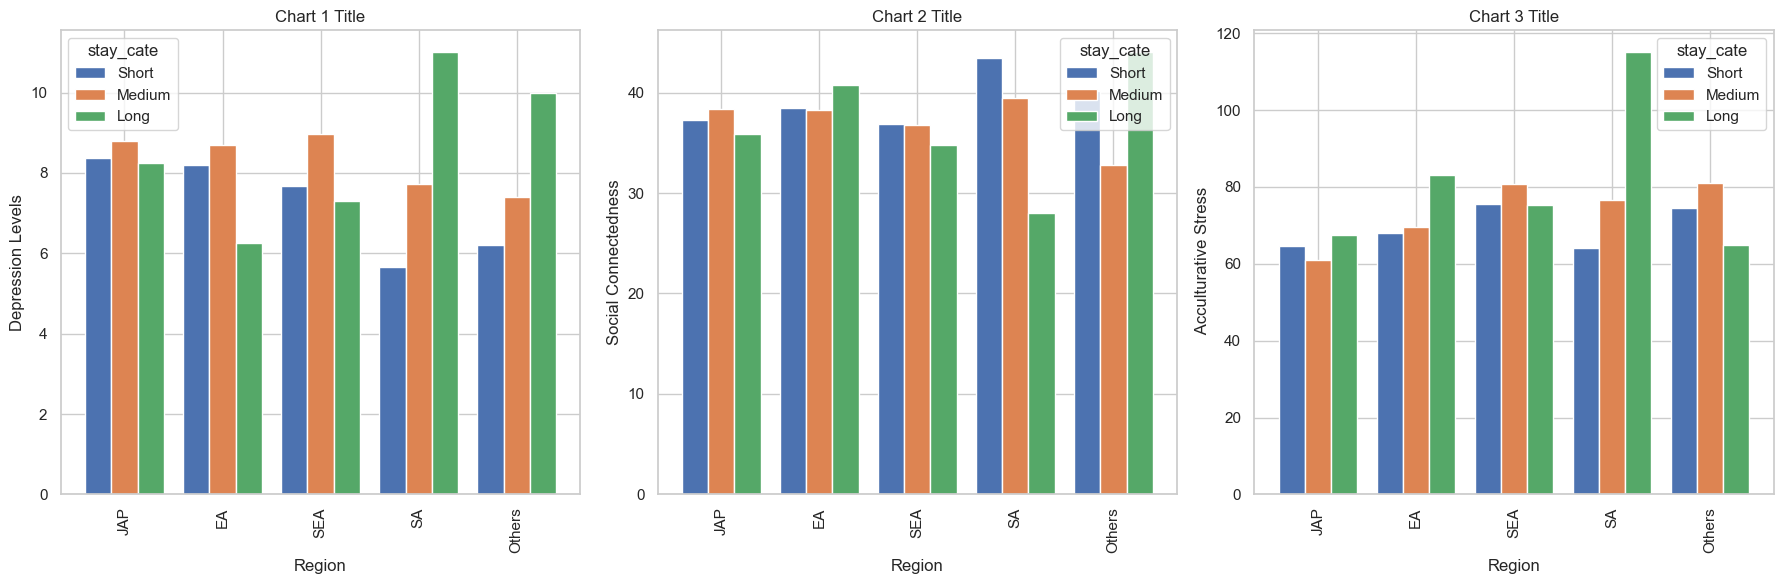

In [10]:
query1 = """
SELECT 
    AVG(todep) as avg_depression,
    region,
    stay_cate
FROM 
    students
GROUP BY 
    region, stay_cate;
"""
cursor.execute(query1)

mental_health_data1 = cursor.fetchall()
columns1 = [desc[0] for desc in cursor.description]
df1 = pd.DataFrame(mental_health_data1, columns=columns1)

df1['avg_depression'] = df1['avg_depression'].apply(float)

pivot_table1 = df1.pivot_table(index='region', columns='stay_cate', values='avg_depression', aggfunc=np.mean)

region_order = ['JAP', 'EA', 'SEA', 'SA', 'Others']
pivot_table1 = pivot_table1.reindex(region_order)

column_order = ['Short', 'Medium', 'Long']
pivot_table1 = pivot_table1[column_order]


query2 = """
SELECT 
    AVG(tosc) as avg_depression,
    region,
    stay_cate
FROM 
    students
GROUP BY 
    region, stay_cate;
"""
cursor.execute(query2)

mental_health_data2 = cursor.fetchall()
columns2 = [desc[0] for desc in cursor.description]
df2 = pd.DataFrame(mental_health_data2, columns=columns2)

df2['avg_depression'] = df2['avg_depression'].apply(float)

pivot_table2 = df2.pivot_table(index='region', columns='stay_cate', values='avg_depression', aggfunc=np.mean)

region_order2 = ['JAP', 'EA', 'SEA', 'SA', 'Others']
pivot_table2 = pivot_table2.reindex(region_order2)

column_order2 = ['Short', 'Medium', 'Long']
pivot_table2 = pivot_table2[column_order2]


query3 = """
SELECT 
    AVG(toas) as avg_depression,
    region,
    stay_cate
FROM 
    students
GROUP BY 
    region, stay_cate;
"""
cursor.execute(query3)

mental_health_data3 = cursor.fetchall()
columns3 = [desc[0] for desc in cursor.description]
df3 = pd.DataFrame(mental_health_data3, columns=columns3)

df3['avg_depression'] = df3['avg_depression'].apply(float)

pivot_table3 = df3.pivot_table(index='region', columns='stay_cate', values='avg_depression', aggfunc=np.mean)


region_order3 = ['JAP', 'EA', 'SEA', 'SA', 'Others']
pivot_table3 = pivot_table3.reindex(region_order3)

column_order3 = ['Short', 'Medium', 'Long']
pivot_table3 = pivot_table3[column_order3]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

pivot_table1.plot(kind='bar', width=0.8, ax=axes[0])
axes[0].set_title('Chart 1 Title')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Depression Levels')

pivot_table2.plot(kind='bar', width=0.8, ax=axes[1])
axes[1].set_title('Chart 2 Title')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Social Connectedness')

pivot_table3.plot(kind='bar', width=0.8, ax=axes[2])
axes[2].set_title('Chart 3 Title')
axes[2].set_xlabel('Region')
axes[2].set_ylabel(' Acculturative Stress')

plt.tight_layout()
plt.show()

Students from most regions experienced the worst mental health conditions during the second and third years of their university life. Distinctively, the level of mental depression and acculturative stress among students from South Asian countries (excluding Japan) increased as they stayed longer, while their sense of connectedness to society decreased over time.

## Conclusion

We can see that main findings from this dataset is how the level of social connectedness and acculturative stress are predictive of the reported depression among international as well as domestic students

Hakan Gezginci